## Importing required libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


from subprocess import check_output
print(check_output(["ls", "./inputs"]).decode("utf8")) #check the files available in the directory'

Main.ipynb
data_description.txt
sample_submission.csv
test.csv
train.csv



## Reading files

In [2]:
#reading training and test datasets
train = pd.read_csv('./inputs/train.csv')
test = pd.read_csv('./inputs/test.csv')

In [3]:
#display the first five rows of the train dataset
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#display the first five rows of the test dataset
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Data Processing

### Redundant Columns

In [5]:
##Dropping ID column
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#check if there are same number of unique IDs in test and train datasets
print(len(np.unique(train['Id'])) == len(train))
print(len(np.unique(test['Id'])) == len(test))

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 
True
True

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


In [6]:
train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Outliers

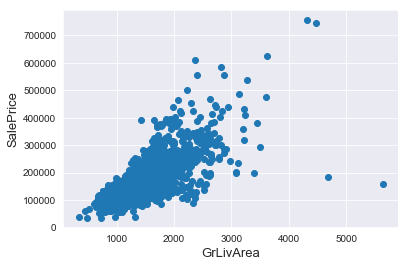

In [7]:
##Outliers
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

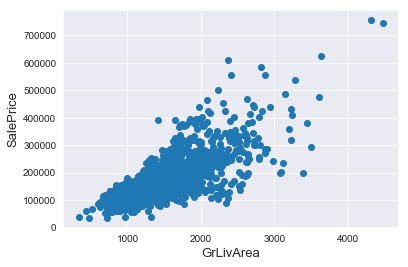

In [8]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

### Analysis on Prediction Variable - SalePrice

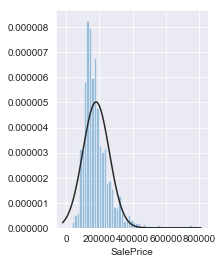

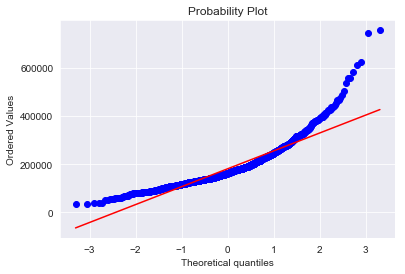

In [9]:
##Analysis on saleprice varaible as it is the variable to be predicted
sns.distplot(train['SalePrice'] , fit=norm);

plt.subplot(1, 2, 1)
sns.distplot(train.SalePrice, kde=False, fit = norm)

#Get the probability plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [10]:
#Log-transformation of the target variable
train.SalePrice = np.log1p(train.SalePrice)

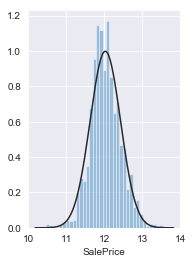

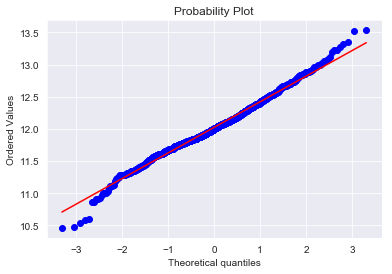

In [11]:
##Analysis on log-saleprice varaible as it is the variable to be predicted
sns.distplot(train['SalePrice'] , fit=norm);

plt.subplot(1, 2, 1)
sns.distplot(train.SalePrice, kde=False, fit = norm)

#Get the probability plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

### Concatenate data (for Feature Engineering)

In [12]:
#concatenate train and test data
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
features = pd.concat((train, test)).reset_index(drop=True)
features.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(features.shape))

all_data size is : (2917, 79)


### Shows Correlation of features with SalePrice

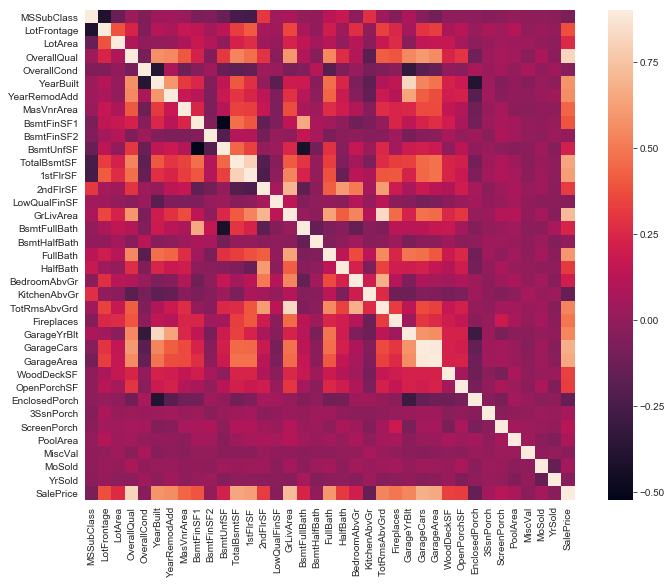

In [13]:
#data correlation to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)


### Check % of missing data by features

Text(0.5,1,'Percent missing data by feature')

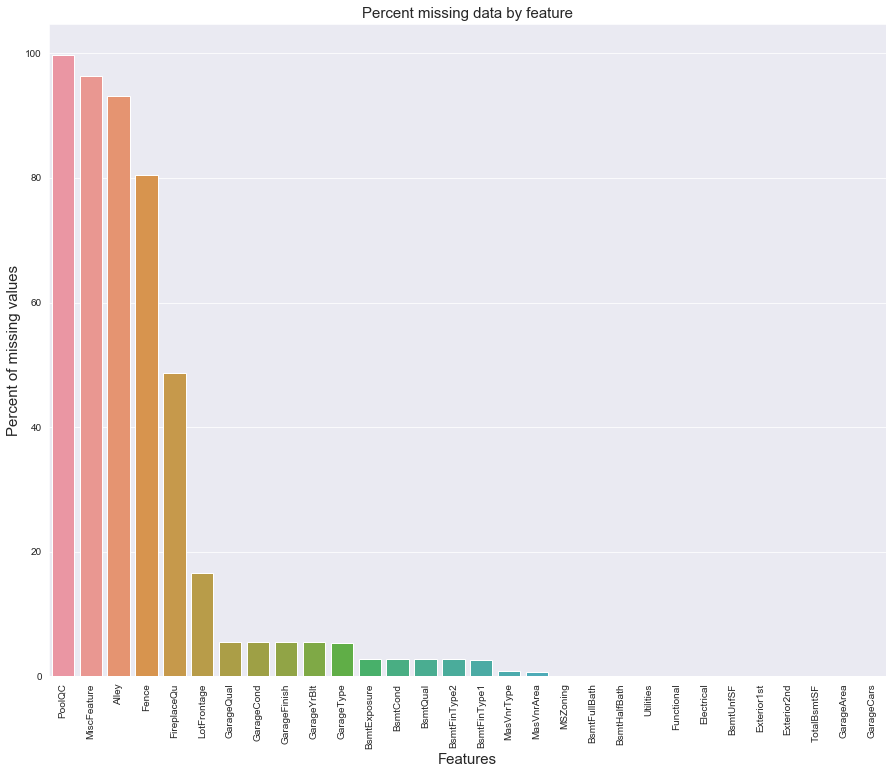

In [14]:
#check missing data
features_na = (features.isnull().sum() / len(features)) * 100
features_na = features_na.drop(features_na[features_na == 0].index).sort_values(ascending=False)[:30]
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=features_na.index, y=features_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

### Check number of missing values for each feature

In [15]:
#retrieve number of missing values for each feature
nulls = np.sum(features.isnull())
nullcols = nulls.loc[(nulls != 0)]
dtypes = features.dtypes
dtypes2 = dtypes.loc[(nulls != 0)]
info = pd.concat([nullcols, dtypes2], axis=1).sort_values(by=0, ascending=False)
print(info)
print("There are", len(nullcols), "columns with missing values")

                 0        1
PoolQC        2908   object
MiscFeature   2812   object
Alley         2719   object
Fence         2346   object
FireplaceQu   1420   object
LotFrontage    486  float64
GarageCond     159   object
GarageQual     159   object
GarageYrBlt    159  float64
GarageFinish   159   object
GarageType     157   object
BsmtExposure    82   object
BsmtCond        82   object
BsmtQual        81   object
BsmtFinType2    80   object
BsmtFinType1    79   object
MasVnrType      24   object
MasVnrArea      23  float64
MSZoning         4   object
Utilities        2   object
Functional       2   object
BsmtHalfBath     2  float64
BsmtFullBath     2  float64
GarageCars       1  float64
Exterior2nd      1   object
Exterior1st      1   object
KitchenQual      1   object
Electrical       1   object
BsmtUnfSF        1  float64
BsmtFinSF2       1  float64
BsmtFinSF1       1  float64
SaleType         1   object
TotalBsmtSF      1  float64
GarageArea       1  float64
There are 34 columns

### Filling missing values

Most of these can be filled with 'None' with some exceptions

Functional: The documentation says that we should assume "Typ", so lets impute that.
Electrical: The documentation doesn't give any information but obviously every house has this so let's impute the most common value: "SBrkr".
KitchenQual: Similar to Electrical, most common value: "TA".
Exterior 1 and Exterior 2: Let's use the most common one here.
SaleType: Similar to electrical, let's use most common value.

In [16]:
features['Functional'] = features['Functional'].fillna('Typ')
features['Electrical'] = features['Electrical'].fillna("SBrkr")
features['KitchenQual'] = features['KitchenQual'].fillna("TA")

features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])
features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])

features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])

### Manual analysis to figure out the best imputation strategy
We tackle variables with very few missing values

#### Pool

In [17]:
#Retrieve rows with pool with NA values for pool
pd.set_option('max_columns', None)
features[features['PoolArea'] > 0 & features['PoolQC'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
197,1360,1360,0,NaN,4,1Fam,TA,No,1036.000,184.000,GLQ,LwQ,1.000,1.000,TA,140.000,Y,Artery,Norm,SBrkr,552,Gd,Gd,Stucco,Stucco,GdPrv,Ex,1,PConc,2,Typ,795.000,2.000,TA,Unf,TA,Detchd,1918.000,3112,0,GasA,Gd,2Story,1,Gd,Lvl,Gtl,25419,Corner,174.000,Reg,392,75,RL,0.000,None,NaN,0,3,NAmes,16,4,8,Y,512,Ex,CompShg,Gable,Abnorml,WD,0,Pave,8,1360.000,AllPub,0,1918,1990,2006
809,1309,0,0,NaN,3,1Fam,TA,No,663.000,377.000,ALQ,LwQ,1.000,0.000,TA,0.000,Y,Norm,Norm,SBrkr,0,TA,TA,HdBoard,HdBoard,GdPrv,Fa,1,CBlock,1,Typ,484.000,2.000,TA,RFn,TA,Attchd,1974.000,1309,1,GasA,Fa,1Story,1,Gd,Lvl,Gtl,10140,Inside,78.000,Reg,0,20,RL,99.000,BrkFace,NaN,0,1,NWAmes,0,6,6,Y,648,Fa,CompShg,Hip,Normal,WD,0,Pave,5,1040.000,AllPub,265,1974,1999,2006
1169,1118,0,0,NaN,3,1Fam,TA,Av,522.000,0.000,ALQ,Unf,1.000,0.000,TA,574.000,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,GdPrv,Po,1,CBlock,1,Typ,358.000,1.000,TA,Fin,TA,Attchd,1977.000,1118,0,GasA,TA,SLvl,1,TA,Lvl,Gtl,9880,Inside,76.000,Reg,0,80,RL,0.000,None,NaN,0,7,Mitchel,0,6,6,Y,576,Gd,CompShg,Gable,Normal,WD,0,Pave,6,1096.000,AllPub,203,1977,1977,2008
1181,2411,2065,0,NaN,4,1Fam,TA,Av,2096.000,0.000,GLQ,Unf,1.000,0.000,Ex,300.000,Y,Norm,Norm,SBrkr,0,TA,Gd,Wd Sdng,ImStucc,MnPrv,TA,2,PConc,3,Typ,813.000,3.000,TA,Fin,TA,Attchd,1996.000,4476,1,GasA,Ex,2Story,1,Ex,Lvl,Gtl,15623,Corner,160.000,IR1,0,60,RL,0.000,None,NaN,0,7,NoRidge,78,5,10,Y,555,Ex,CompShg,Hip,Abnorml,WD,0,Pave,10,2396.000,AllPub,171,1996,1996,2007
1384,1392,1392,0,NaN,5,1Fam,TA,No,790.000,469.000,BLQ,LwQ,1.000,0.000,Gd,133.000,Y,RRAn,Norm,SBrkr,0,TA,TA,Plywood,Plywood,MnPrv,TA,2,CBlock,3,Typ,564.000,2.000,TA,RFn,TA,Attchd,1978.000,2784,1,GasA,TA,2Story,1,Gd,Lvl,Gtl,16692,Inside,80.000,IR1,0,60,RL,184.000,BrkFace,TenC,2000,7,NWAmes,112,5,7,Y,519,Fa,CompShg,Gable,Normal,WD,440,Pave,12,1392.000,AllPub,0,1978,1978,2006
1421,1575,626,0,NaN,4,1Fam,TA,Av,0.000,0.000,Unf,Unf,0.000,0.000,Gd,697.000,Y,Norm,Norm,SBrkr,0,Gd,Gd,Plywood,Plywood,GdPrv,Gd,1,CBlock,2,Typ,432.000,2.000,Gd,Unf,Gd,Attchd,1966.000,2201,0,GasA,TA,SLvl,1,Gd,Lvl,Gtl,19690,CulDSac,nan,IR1,0,80,RL,0.000,None,NaN,0,8,Edwards,236,7,6,Y,738,Gd,Tar&Grv,Flat,Alloca,WD,0,Pave,8,697.000,AllPub,586,1966,1966,2006
1972,2470,0,0,NaN,1,1Fam,TA,Gd,2257.000,0.000,GLQ,Unf,2.000,0.000,Ex,278.000,Y,Norm,Norm,SBrkr,0,TA,Ex,MetalSd,MetalSd,NaN,Gd,2,PConc,1,Typ,789.000,3.000,TA,Fin,TA,Attchd,2003.000,2470,1,GasA,Ex,1Story,1,Ex,HLS,Mod,12720,Inside,106.000,Reg,0,20,RL,680.000,Stone,NaN,0,2,NridgHt,65,5,10,Y,144,Ex,CompShg,Hip,Normal,WD,216,Pave,7,2535.000,AllPub,154,2003,2003,2008
2418,1647,0,0,NaN,3,1Fam,TA,No,595.000,354.000,BLQ,Rec,1.000,0.000,TA,156.000,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,GdPrv,Fa,1,CBlock,1,Min1,280.000,1.000,TA,Fin,TA,Attchd,1953.000,1647,0,GasA,Gd,1Story,1,TA,Lvl,Gtl,9532,Inside,75.000,Reg,0,20,RL,0.000,None,NaN,0,2,NAmes,0,6,4,Y,368,NaN,CompShg,Gable,Normal,WD,0,Pave,6,1105.000,AllPub,225,1953,1953,2007
2501,1105,717,0,NaN,4,1Fam,TA,No,0.000,0.000,Unf,Unf,0.000,0.000,TA,1105.000,Y,Feedr,Norm,SBrkr,1012,TA,TA,Wd Sdng,Wd Sdng,NaN,Po,1,CBlock,2,Min2,515.000,2.000,TA,Unf,TA,Attchd,1984.000,1822,0,GasA,Ex,1.5Fin,1,Gd,Lvl,Gtl,23920,Inside,104.000,Reg,0,50,RL,0.00

There are three NaN's foor PoolQC that have a PoolArea. Let's impute them based on overall quality of the house

In [18]:
features.loc[2418, 'PoolQC'] = 'Fa'
features.loc[2501, 'PoolQC'] = 'Gd'
features.loc[2597, 'PoolQC'] = 'Fa'

#### Garage

In [19]:
#Retrieve houses with garage with NA values for Garage variables
pd.set_option('max_columns', None)
features[(features['GarageType'] == 'Detchd') & (features['GarageYrBlt'].isnull() | features['GarageFinish'].isnull() | features['GarageCars'].isnull() | features['GarageArea'].isnull() | features['GarageQual'].isnull() | features['GarageCond'].isnull())]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
2124,1242,742,0,Grvl,5,2fmCon,TA,Mn,196.000,0.000,Rec,Unf,0.000,0.000,TA,1046.000,Y,Norm,Norm,SBrkr,180,TA,TA,Wd Sdng,Wd Sdng,MnPrv,NaN,0,PConc,2,Typ,360.000,1.000,NaN,NaN,NaN,Detchd,nan,1984,0,GasA,Gd,2.5Unf,1,TA,Lvl,Gtl,8094,Inside,57.000,Reg,0,60,RM,0.000,None,Shed,1000,9,OldTown,0,8,6,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,8,1242.000,AllPub,64,1910,1983,2008
2574,942,886,0,NaN,3,1Fam,TA,No,548.000,0.000,ALQ,Unf,0.000,0.000,Gd,311.000,Y,Norm,Norm,SBrkr,212,TA,TA,Wd Sdng,Plywood,MnPrv,NaN,0,BrkTil,2,Typ,nan,nan,NaN,NaN,NaN,Detchd,nan,1828,0,GasA,Ex,2Story,1,Gd,Lvl,Gtl,9060,Inside,50.000,Reg,0,70,RM,0.000,None,NaN,0,3,IDOTRR,0,6,5,Y,0,NaN,CompShg,Gable,Alloca,WD,0,Pave,6,859.000,AllPub,174,1923,1999,2007


There are houses with garages that are detached but that have NaN's for all other Garage variables. Let's impute these using the median or mode of the avaialble data

In [20]:
features.loc[2124, 'GarageYrBlt'] = features['GarageYrBlt'].median()
features.loc[2574, 'GarageYrBlt'] = features['GarageYrBlt'].median()

features.loc[2124, 'GarageFinish'] = features['GarageFinish'].mode()[0]
features.loc[2574, 'GarageFinish'] = features['GarageFinish'].mode()[0]

features.loc[2574, 'GarageCars'] = features['GarageCars'].median()

features.loc[2124, 'GarageArea'] = features['GarageArea'].median()
features.loc[2574, 'GarageArea'] = features['GarageArea'].median()

features.loc[2124, 'GarageQual'] = features['GarageQual'].mode()[0]
features.loc[2574, 'GarageQual'] = features['GarageQual'].mode()[0]

features.loc[2124, 'GarageCond'] = features['GarageCond'].mode()[0]
features.loc[2574, 'GarageCond'] = features['GarageCond'].mode()[0]

#### Basement

In [21]:
basement_columns = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                   'BsmtFinType2', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                   'TotalBsmtSF']

tempdf = features[basement_columns]
tempdfnulls = tempdf[tempdf.isnull().any(axis=1)]

#select just the rows that have less then 5 NA's, 
# meaning there is incongruency in the row.
tempdfnulls[(tempdfnulls.isnull()).sum(axis=1) < 5]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
332,Gd,TA,No,GLQ,NaN,1124.000,479.000,1603.000,3206.000
947,Gd,TA,NaN,Unf,Unf,0.000,0.000,936.000,936.000
1485,Gd,TA,NaN,Unf,Unf,0.000,0.000,1595.000,1595.000
2038,Gd,NaN,Mn,GLQ,Rec,1044.000,382.000,0.000,1426.000
2183,TA,NaN,No,BLQ,Unf,1033.000,0.000,94.000,1127.000
2215,NaN,Fa,No,Unf,Unf,0.000,0.000,173.000,173.000
2216,NaN,TA,No,Unf,Unf,0.000,0.000,356.000,356.000
2346,Gd,TA,NaN,Unf,Unf,0.000,0.000,725.000,725.000
2522,TA,NaN,Av,ALQ,Unf,755.000,0.000,240.000,995.000


Input all incongruencies with the most likely value based on manual analysis

In [22]:
features.loc[332, 'BsmtFinType2'] = 'ALQ' #since smaller than SF1
features.loc[947, 'BsmtExposure'] = 'No' 
features.loc[1485, 'BsmtExposure'] = 'No'
features.loc[2038, 'BsmtCond'] = 'TA'
features.loc[2183, 'BsmtCond'] = 'TA'
features.loc[2215, 'BsmtQual'] = 'Po' #v small basement so let's do Poor.
features.loc[2216, 'BsmtQual'] = 'Fa' #similar but a bit bigger.
features.loc[2346, 'BsmtExposure'] = 'No' #unfinished bsmt so prob not.
features.loc[2522, 'BsmtCond'] = 'Gd' #cause ALQ for bsmtfintype1

#### MSZoning

In [23]:
pd.set_option('max_columns', None)
features[features['MSZoning'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1913,810,0,0,NaN,1,1Fam,NaN,NaN,0.000,0.000,NaN,NaN,0.000,0.000,NaN,0.000,N,Norm,Norm,FuseA,0,Fa,Fa,Wd Sdng,Wd Sdng,NaN,NaN,0,CBlock,1,Min1,280.000,1.000,TA,Unf,TA,Detchd,1975.000,810,0,GasA,TA,1Story,1,TA,Lvl,Gtl,21780,Inside,109.000,Reg,0,30,NaN,0.000,None,NaN,0,3,IDOTRR,24,4,2,N,0,NaN,CompShg,Gable,Normal,ConLD,0,Grvl,4,0.000,NaN,119,1910,1950,2009
2214,733,0,0,NaN,2,1Fam,NaN,NaN,0.000,0.000,NaN,NaN,0.000,0.000,NaN,0.000,N,Norm,Norm,FuseA,0,Po,Fa,AsbShng,VinylSd,NaN,NaN,0,Slab,1,Typ,487.000,2.000,Po,Unf,Fa,Attchd,1952.000,733,0,Wall,Po,1Story,1,Fa,Low,Mod,14584,Inside,80.000,Reg,0,20,NaN,0.000,None,NaN,0,2,IDOTRR,0,5,1,N,0,NaN,CompShg,Gable,Abnorml,WD,0,Pave,4,0.000,AllPub,0,1952,1952,2008
2248,1150,686,0,NaN,4,1Fam,TA,No,0.000,0.000,Unf,Unf,0.000,0.000,TA,686.000,Y,Norm,Norm,SBrkr,0,TA,TA,Wd Sdng,Wd Sdng,NaN,NaN,0,BrkTil,2,Maj1,288.000,1.000,Fa,Unf,TA,Detchd,1900.000,1836,0,GasA,Ex,2.5Unf,1,TA,Low,Gtl,56600,Inside,nan,IR1,0,70,NaN,0.000,None,NaN,0,1,IDOTRR,0,1,5,N,0,NaN,CompShg,Hip,Normal,WD,0,Pave,7,686.000,AllPub,0,1900,1950,2008
2902,1600,0,0,NaN,3,1Fam,NaN,NaN,0.000,0.000,NaN,NaN,0.000,0.000,NaN,0.000,Y,Artery,Norm,FuseA,135,Fa,TA,CBlock,VinylSd,NaN,NaN,0,CBlock,1,Mod,270.000,1.000,TA,Unf,Fa,Attchd,1951.000,1600,1,GasA,TA,1Story,1,TA,Lvl,Gtl,31250,Inside,125.000,Reg,0,20,NaN,0.000,None,NaN,0,5,Mitchel,0,3,1,N,0,NaN,CompShg,Gable,Normal,WD,0,Pave,6,0.000,AllPub,0,1951,1951,2006


Replace missing zoning values with values that correspond with MSSubClass (from other non missing value rows)

In [24]:
subclass_group = features.groupby('MSSubClass')
Zoning_modes = subclass_group['MSZoning'].apply(lambda x : x.mode()[0])
features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

Automatic conversion for the rest of the missing values to None and check for other missing values in other columns

In [25]:
objects = []
for i in features.columns:
    if features[i].dtype == object:
        objects.append(i)

features.update(features[objects].fillna('None'))

nulls = np.sum(features.isnull())
nullcols = nulls.loc[(nulls != 0)]
dtypes = features.dtypes
dtypes2 = dtypes.loc[(nulls != 0)]
info = pd.concat([nullcols, dtypes2], axis=1).sort_values(by=0, ascending=False)
print(info)
print("There are", len(nullcols), "columns with missing values")

                0        1
LotFrontage   486  float64
GarageYrBlt   157  float64
MasVnrArea     23  float64
BsmtFullBath    2  float64
BsmtHalfBath    2  float64
BsmtFinSF1      1  float64
BsmtFinSF2      1  float64
BsmtUnfSF       1  float64
TotalBsmtSF     1  float64
There are 9 columns with missing values


#### LotFrontage
Check if it is linked to what kind of area you live in.

In [26]:
neighborhood_group = features.groupby('Neighborhood')
lot_medians = neighborhood_group['LotFrontage'].median()
lot_medians

Neighborhood
Blmngtn   43.000
Blueste   24.000
BrDale    21.000
BrkSide   51.000
ClearCr   80.500
CollgCr   70.000
Crawfor   70.000
Edwards   64.500
Gilbert   64.000
IDOTRR    60.000
MeadowV   21.000
Mitchel   74.000
NAmes     73.000
NPkVill   24.000
NWAmes    80.000
NoRidge   89.000
NridgHt   92.000
OldTown   60.000
SWISU     60.000
Sawyer    72.000
SawyerW   67.000
Somerst   72.500
StoneBr   60.000
Timber    82.000
Veenker   80.000
Name: LotFrontage, dtype: float64

The lotfrontage averages differ a lot per neighborhood so replace the missing lotfrontage values with the median

In [27]:
features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

#### GarageYrBlt
GarageYrBlt does not have any incongruencies since we did the processing just now

#### MasVnrArea

In [28]:
pd.set_option('max_columns', None)
features[(features['MasVnrArea'].isnull())]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
234,860,1100,0,None,4,1Fam,TA,No,625.000,0.000,GLQ,Unf,1.000,0.000,Gd,235.000,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,TA,2,PConc,2,Typ,440.000,2.000,TA,Fin,TA,BuiltIn,2002.000,1960,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,7851,Inside,64.000,Reg,0,60,RL,nan,None,None,0,5,Gilbert,48,5,6,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,8,860.000,AllPub,288,2002,2002,2010
528,2515,0,0,None,4,1Fam,TA,No,1219.000,0.000,Rec,Unf,1.000,0.000,TA,816.000,Y,Norm,Norm,SBrkr,200,TA,Gd,Wd Sdng,Stone,None,TA,2,PConc,3,Maj1,484.000,2.000,TA,RFn,TA,Attchd,1975.000,2515,0,GasA,TA,1Story,2,TA,Lvl,Gtl,32668,CulDSac,70.000,IR1,0,20,RL,nan,None,None,0,3,Crawfor,0,3,6,Y,0,None,CompShg,Hip,Alloca,WD,0,Pave,9,2035.000,AllPub,0,1957,1975,2007
649,822,843,0,None,3,1Fam,TA,No,0.000,0.000,Unf,Unf,0.000,0.000,Gd,813.000,Y,Norm,Norm,SBrkr,0,TA,Gd,CemntBd,CmentBd,None,None,0,PConc,2,Typ,562.000,2.000,TA,RFn,TA,Attchd,2007.000,1665,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,8125,Inside,65.000,Reg,0,60,FV,nan,None,None,0,5,Somerst,0,6,7,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,7,813.000,AllPub,0,2007,2007,2008
935,1200,0,0,None,2,1Fam,TA,No,833.000,0.000,GLQ,Unf,1.000,0.000,Gd,343.000,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,None,0,PConc,2,Typ,555.000,2.000,TA,RFn,TA,Attchd,2003.000,1200,0,GasA,Ex,1Story,1,Gd,Lvl,Gtl,10083,Inside,67.000,Reg,0,20,RL,nan,None,None,0,8,SawyerW,41,5,7,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,5,1176.000,AllPub,0,2003,2003,2009
972,1428,0,0,None,3,1Fam,TA,No,0.000,0.000,Unf,Unf,0.000,0.000,Gd,1428.000,Y,Norm,Norm,SBrkr,0,TA,Gd,CemntBd,CmentBd,None,None,0,PConc,2,Typ,480.000,2.000,TA,Fin,TA,Attchd,2007.000,1428,0,GasA,Ex,1Story,1,Gd,Lvl,Gtl,11639,Corner,95.000,Reg,0,20,FV,nan,None,None,0,12,Somerst,120,5,7,Y,0,None,CompShg,Gable,Partial,New,0,Pave,6,1428.000,AllPub,0,2007,2008,2008
976,1241,0,0,Pave,1,TwnhsE,TA,No,1106.000,0.000,GLQ,Unf,1.000,0.000,Gd,135.000,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,None,0,PConc,1,Typ,569.000,2.000,TA,Fin,TA,Attchd,2007.000,1241,1,GasA,Ex,1Story,1,Gd,Lvl,Gtl,4274,Inside,35.000,IR1,0,120,FV,nan,None,None,0,11,Somerst,116,5,7,Y,0,None,CompShg,Gable,Partial,New,0,Pave,4,1241.000,AllPub,0,2006,2007,2007
1242,2076,0,0,None,2,1Fam,Gd,Gd,1386.000,0.000,GLQ,Unf,1.000,0.000,Ex,690.000,Y,Norm,Norm,SBrkr,0,TA,Ex,VinylSd,VinylSd,None,Gd,1,PConc,2,Typ,850.000,3.000,TA,Fin,TA,Attchd,2006.000,2076,1,GasA,Ex,1Story,1,Ex,Lvl,Gtl,13891,Inside,107.000,Reg,0,20,RL,nan,None,None,0,9,NridgHt,229,5,10,Y,0,None,CompShg,Gable,Partial,New,0,Pave,7,2076.000,AllPub,216,2006,2006,2006
1277,1128,903,0,None,3,1Fam,TA,No,804.000,0.000,GLQ,Unf,1.000,0.000,Gd,324.000,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,Gd,1,PConc,2,Typ,577.000,2.000,TA,RFn,TA,Attchd,2002.000,2031,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,9473,Inside,75.000,Reg,0,60,RL,nan,None,None,0,3,CollgCr,211,5,8,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,7,1128.000,AllPub,0,2002,2002,2008
1689,878,1126,0,None,4,1Fam,TA,No,651.000,0.000,GLQ,Unf,1.000,0.000,Ex,219.000,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,Gd,1,PConc,2,Typ,644.000,3.000,TA,Fin,TA,BuiltIn,2002.000,2004,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,12891,Corner,64.000,IR1,0,60,RL,nan,None,None,0,7,Gilbert,48,5,8,Y,0,

No incongruencies as this means that the property is not present in the house.Can be replaced with 0

In [29]:
#Filling in the rest of the NA's

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics = []
for i in features.columns:
    if features[i].dtype in numeric_dtypes: 
        numerics.append(i)
        
features.update(features[numerics].fillna(0))

In [30]:
nulls = np.sum(features.isnull())
nullcols = nulls.loc[(nulls != 0)]
dtypes = features.dtypes
dtypes2 = dtypes.loc[(nulls != 0)]
info = pd.concat([nullcols, dtypes2], axis=1).sort_values(by=0, ascending=False)
print(info)
print("There are", len(nullcols), "columns with missing values")

Empty DataFrame
Columns: [0, 1]
Index: []
There are 0 columns with missing values


### Incorrect Values
We use min and max value to check for odd values

In [31]:
#df.describe() Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s 
#distribution, excluding NaN values.
features.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000
mean,1157.692,335.862,2.604,2.860,438.865,49.599,0.429,0.061,560.504,23.114,0.596,1.567,472.453,1.766,1871.627,1498.252,0.380,1.045,10139.439,69.436,4.698,57.136,100.931,50.861,6.214,47.280,5.565,6.086,2.089,16.073,6.448,1048.968,93.629,1971.288,1984.248,2007.793
std,385.264,428.120,25.197,0.823,444.181,169.232,0.524,0.246,439.699,64.263,0.645,0.552,214.574,0.761,447.159,496.909,0.503,0.215,7807.037,21.208,46.413,42.532,178.032,567.595,2.713,67.119,1.113,1.407,34.561,56.202,1.564,429.472,126.533,30.287,20.892,1.315
min,334.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,334.000,0.000,0.000,1300.000,21.000,0.000,20.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,2.000,0.000,0.000,1872.000,1950.000,2006.000
25%,876.000,0.000,0.000,2.000,0.000,0.000,0.000,0.000,220.000,0.000,0.000,1.000,320.000,1.000,1957.000,1126.000,0.000,1.000,7476.000,60.000,0.000,20.000,0.000,0.000,4.000,0.000,5.000,5.000,0.000,0.000,5.000,793.000,0.000,1953.000,1965.000,2007.000
50%,1082.000,0.000,0.000,3.000,368.000,0.000,0.000,0.000,467.000,0.000,1.000,2.000,480.000,2.000,1977.000,1444.000,0.000,1.000,9452.000,70.000,0.000,50.000,0.000,0.000,6.000,26.000,5.000,6.000,0.000,0.000,6.000,988.000,0.000,1973.000,1993.000,2008.000
75%,1384.000,704.000,0.000,3.000,733.000,0.000,1.000,0.000,804.000,0.000,1.000,2.000,576.000,2.000,2001.000,1743.000,1.000,1.000,11556.000,80.000,0.000,70.000,163.000,0.000,8.000,70.000,6.000,7.000,0.000,0.000,7.000,1302.000,168.000,2001.000,2004.000,2009.000
max,5095.000,2065.000,508.000,8.000,4010.000,1526.000,3.000,2.000,2336.000,1012.000,4.000,4.000,1488.000,5.000,2207.000,5095.000,2.000,3.000,215245.000,313.000,1064.000,190.000,1600.000,17000.000,12.000,742.000,9.000,10.000,800.000,576.000,15.000,5095.000,1424.000,2010.000,2010.000,2010.000


GarageYrBlt - the max value is 2207, this is obviously wrong since the data is only until 2010. We inspect this row a bit more carefully and impute an approximate correct value.

In [32]:
features[features['GarageYrBlt'] == 2207]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
2590,1564,0,0,None,2,1Fam,TA,Av,583.000,0.000,GLQ,Unf,0.000,0.000,Gd,963.000,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,Gd,1,PConc,2,Typ,502.000,2.000,TA,RFn,TA,Attchd,2207.000,1564,0,GasA,Ex,1Story,1,Ex,HLS,Gtl,8298,Inside,68.000,IR1,0,20,RL,0.000,None,None,0,9,Timber,0,5,8,Y,0,None,CompShg,Hip,Partial,New,0,Pave,6,1546.000,AllPub,132,2006,2007,2007


This particular datapoint has YearBuilt in 2006 and YearRemodAdd in 2007. 2207 most likely is a data input error that should have been 2007 when the remodel happened. Let's replace with 2007.

In [33]:
features.loc[2590, 'GarageYrBlt'] = 2007

### Factorization

Features that are read in as numericals but are actually objects. E.g MSSubClass: Identifies the type of dwelling involved in the sale.	

In [34]:
#MSSubClass=The building class
features['MSSubClass'] = features['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
features['OverallCond'] = features['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
features['YrSold'] = features['YrSold'].astype(str)
features['MoSold'] = features['MoSold'].astype(str)

### Skew transformation features
Skew affects the regression intercept, coefficients associated with the model.

In [35]:
from scipy.stats import skew

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in features.columns:
    if features[i].dtype in numeric_dtypes: 
        numerics2.append(i)

skew_features = features[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews = pd.DataFrame({'skew':skew_features})
skews

,skew
MiscVal,21.940
PoolArea,17.689
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372
KitchenAbvGr,4.301
BsmtFinSF2,4.145
EnclosedPorch,4.002
ScreenPorch,3.945
BsmtHalfBath,3.930


boxcox1p transformation is used here because  log transform still produces some skew in the data.

In [36]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

high_skew = skew_features[skew_features > 0.5]
high_skew = high_skew
skew_index = high_skew.index

for i in skew_index:
    features[i]= boxcox1p(features[i], boxcox_normmax(features[i]+1))

        
skew_features2 = features[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews2 = pd.DataFrame({'skew':skew_features2})
skews2

,skew
PoolArea,15.595
3SsnPorch,8.862
LowQualFinSF,8.493
MiscVal,5.238
BsmtHalfBath,3.779
KitchenAbvGr,3.778
ScreenPorch,3.153
BsmtFinSF2,2.578
EnclosedPorch,2.149
MasVnrArea,0.978


### Creating features
- Size of the house
- Bathrooms
- porch size
- haspool
- has2ndfloor
- hasgarage
- hasbsmt
- hasfireplace

In [37]:
features['Total_sqr_footage'] = (features['BsmtFinSF1'] + features['BsmtFinSF2'] +
                                 features['1stFlrSF'] + features['2ndFlrSF'])

features['Total_Bathrooms'] = (features['FullBath'] + (0.5*features['HalfBath']) + 
                               features['BsmtFullBath'] + (0.5*features['BsmtHalfBath']))

features['Total_porch_sf'] = (features['OpenPorchSF'] + features['3SsnPorch'] +
                              features['EnclosedPorch'] + features['ScreenPorch'] +
                             features['WoodDeckSF'])


#simplified features
features['haspool'] = features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
features['has2ndfloor'] = features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
features['hasgarage'] = features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
features['hasbsmt'] = features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
features['hasfireplace'] = features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

### Creating Dummies
Since sklearn lm.fit() does not accept strings we have to convert our objects to dummy variables.

In [38]:
features = pd.get_dummies(features)
print(features.shape)
train = features[:ntrain]
test = features[ntrain:]
print(train.shape)
print(test.shape)

(2917, 349)
(1458, 349)
(1459, 349)


### Overfitting values
To prevent overfitting we wil remove columns that have more than 99.4% 1 or 0

In [39]:
overfit = []
for i in train.columns:
    counts = train[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(train) * 100 >99.94:
        overfit.append(i)
overfit = list(overfit)
overfit

['BsmtQual_Po', 'MSSubClass_150', 'Utilities_None']

In [40]:
#drop MSZoning_C (all) as it has a high percentage of zeros
overfit.append('MSZoning_C (all)')

In [41]:
train.drop(overfit,axis=1,inplace=True)
test.drop(overfit,axis=1,inplace=True)

In [42]:
print(train.shape)
print(test.shape)

(1458, 345)
(1459, 345)


## Model

In [43]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [44]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [45]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [46]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [47]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [48]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [49]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [50]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [51]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1121 (0.0057)



In [52]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1121 (0.0058)



In [53]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.2349 (0.0247)



In [54]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1169 (0.0072)



In [55]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1183 (0.0045)



In [56]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1179 (0.0057)



### Stacking by averaging

In [57]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [58]:
averaged_models = AveragingModels(models = (ENet, GBoost, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1100 (0.0061)



### Stacking by meta model

In [59]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [60]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1103 (0.0064)


### Ensembling StackedRegressor, XGBoost and LightGBM

In [61]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [62]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.08090498178938253


In [63]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.07958317131485758


In [64]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.07228666943873108


In [65]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission1.csv',index=False)